C:\Users\DELL\AppData\Local\Temp\ipykernel_1644\1425003502.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='sentiment', palette='coolwarm')


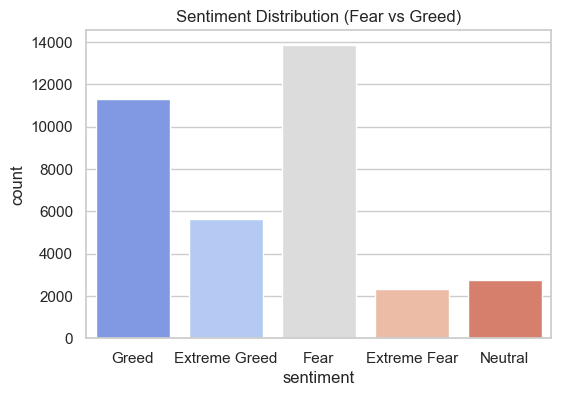

C:\Users\DELL\AppData\Local\Temp\ipykernel_1644\1425003502.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_by_sentiment, x='sentiment', y='Closed PnL', palette='Set2')


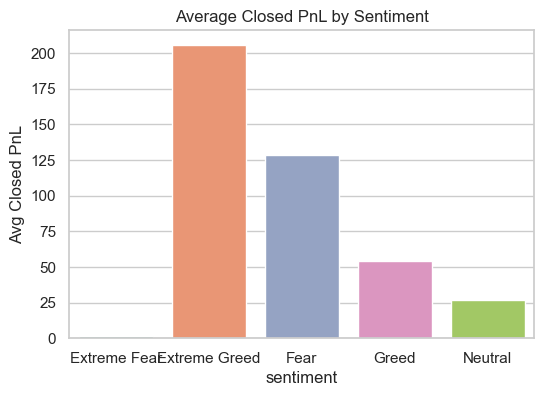

C:\Users\DELL\AppData\Local\Temp\ipykernel_1644\1425003502.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=leverage_plot, x='sentiment', y='Leverage Proxy', palette='magma')


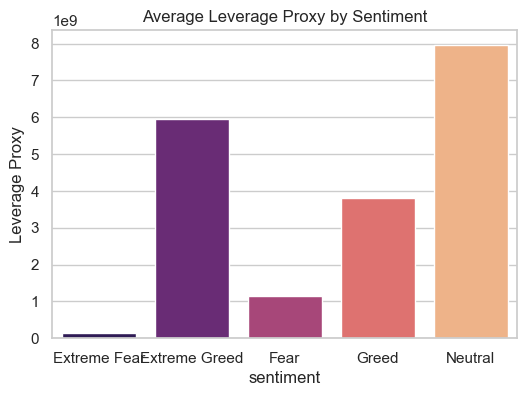

C:\Users\DELL\AppData\Local\Temp\ipykernel_1644\1425003502.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_plot, x='sentiment', y='Size USD', palette='viridis')


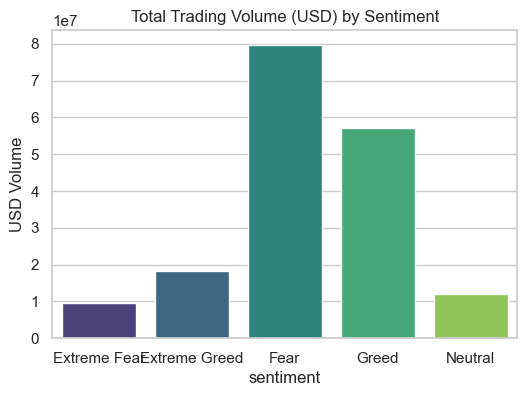

In [ ]:

# 1. Imports and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 2. Load Datasets
fear_df = pd.read_csv('csv_files/fear_greed_index.csv')
trade_df = pd.read_csv('csv_files/historical_data.csv')

# 3. Clean & Format Data 
# Format date in fear/greed data
fear_df['date'] = pd.to_datetime(fear_df['date'])
fear_df = fear_df[['date', 'value', 'classification']]
fear_df.rename(columns={'value': 'fear_score', 'classification': 'sentiment'}, inplace=True)

# Format date in trader data
trade_df['Timestamp IST'] = pd.to_datetime(trade_df['Timestamp IST'], errors='coerce')
trade_df['date'] = trade_df['Timestamp IST'].dt.date
trade_df['date'] = pd.to_datetime(trade_df['date'])

# Filter relevant columns
trade_df = trade_df[['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD',
                     'Side', 'Timestamp IST', 'Start Position', 'Direction',
                     'Closed PnL', 'Fee', 'date']]


# 4. Merge Data on Date
merged_df = pd.merge(trade_df, fear_df, on='date', how='inner')

# Save intermediate file
merged_df.to_csv('csv_files/merged_data.csv', index=False)

# 5. Sentiment Distribution Plot
plt.figure(figsize=(6,4))
sns.countplot(data=merged_df, x='sentiment', palette='coolwarm')
plt.title('Sentiment Distribution (Fear vs Greed)')
plt.savefig('output/sentiment_distribution.png')
plt.show()


#6. Average Closed PnL by Sentiment

pnl_by_sentiment = merged_df.groupby('sentiment')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=pnl_by_sentiment, x='sentiment', y='Closed PnL', palette='Set2')
plt.title('Average Closed PnL by Sentiment')
plt.ylabel('Avg Closed PnL')
plt.savefig('output/pnl_by_sentiment.png')
plt.show()

# 7. Leverage Proxy by Sentiment
merged_df['Leverage Proxy'] = merged_df['Size Tokens'] / (merged_df['Start Position'] + 1e-6)
leverage_plot = merged_df.groupby('sentiment')['Leverage Proxy'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=leverage_plot, x='sentiment', y='Leverage Proxy', palette='magma')
plt.title('Average Leverage Proxy by Sentiment')
plt.ylabel('Leverage Proxy')
plt.savefig('output/leverage_by_sentiment.png')
plt.show()

# 8. Total Volume by Sentiment
volume_plot = merged_df.groupby('sentiment')['Size USD'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=volume_plot, x='sentiment', y='Size USD', palette='viridis')
plt.title('Total Trading Volume (USD) by Sentiment')
plt.ylabel('USD Volume')
plt.savefig('output/volume_by_sentiment.png')
plt.show()


# 9. Summary Metrics to CSV
summary = pd.DataFrame({
    'Metric': ['Average PnL', 'Avg Leverage Proxy', 'Total Volume'],
    'Fear': [
        pnl_by_sentiment.loc[pnl_by_sentiment['sentiment'] == 'Fear', 'Closed PnL'].values[0],
        leverage_plot.loc[leverage_plot['sentiment'] == 'Fear', 'Leverage Proxy'].values[0],
        volume_plot.loc[volume_plot['sentiment'] == 'Fear', 'Size USD'].values[0]
    ],
    'Greed': [
        pnl_by_sentiment.loc[pnl_by_sentiment['sentiment'] == 'Greed', 'Closed PnL'].values[0],
        leverage_plot.loc[leverage_plot['sentiment'] == 'Greed', 'Leverage Proxy'].values[0],
        volume_plot.loc[volume_plot['sentiment'] == 'Greed', 'Size USD'].values[0]
    ]
})

summary.to_csv('csv_files/summary_metrics.csv', index=False)


In [ ]:
# Create summary for selected sentiments
selected_sentiments = ['Fear', 'Greed']

summary = pd.DataFrame({
    'Metric': ['Average PnL', 'Avg Leverage Proxy', 'Total Volume'],
})

for sentiment in selected_sentiments:
    summary[sentiment] = [
        pnl_by_sentiment.loc[pnl_by_sentiment['sentiment'] == sentiment, 'Closed PnL'].values[0],
        leverage_plot.loc[leverage_plot['sentiment'] == sentiment, 'Leverage Proxy'].values[0],
        volume_plot.loc[volume_plot['sentiment'] == sentiment, 'Size USD'].values[0]
    ]

summary.to_csv('csv_files/summary_metrics.csv', index=False)
